In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Bering = pd.read_excel(filepath, sheet_name='Bering-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Bering)
fp.date_time(Bering)

,Extent,Date
0,320266.650,1979-01-01
1,541778.338,1979-02-01
2,638262.988,1979-03-01
3,423025.159,1979-04-01
4,215587.216,1979-05-01
...,...,...
488,317377.493,2023-05-01
489,39601.476,2023-06-01
490,16935.702,2023-07-01
491,1305.744,2023-09-01


In [5]:
scaler = MinMaxScaler()
Bering['Extent'] = scaler.fit_transform(Bering['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 3
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Bering['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((479, 12, 1), (479,))

In [8]:
X_train, y_train = X[:384], y[:384]
X_val, y_val = X[384:432], y[384:432]
X_test, y_test = X[432:], y[432:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Bering_model_LT3/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
42/48 [=========================>....] - ETA: 0s - loss: 0.1497 - root_mean_squared_error: 0.3870

INFO:tensorflow:Assets written to: Bering_model_LT3\assets


INFO:tensorflow:Assets written to: Bering_model_LT3\assets


48/48 [==============================] - 6s 98ms/step - loss: 0.1394 - root_mean_squared_error: 0.3734 - val_loss: 0.0606 - val_root_mean_squared_error: 0.2461
Epoch 2/50
43/48 [=========================>....] - ETA: 0s - loss: 0.1058 - root_mean_squared_error: 0.3252

INFO:tensorflow:Assets written to: Bering_model_LT3\assets


INFO:tensorflow:Assets written to: Bering_model_LT3\assets


48/48 [==============================] - 3s 74ms/step - loss: 0.1019 - root_mean_squared_error: 0.3192 - val_loss: 0.0488 - val_root_mean_squared_error: 0.2210
Epoch 3/50
31/48 [==================>...........] - ETA: 0s - loss: 0.0790 - root_mean_squared_error: 0.2810

INFO:tensorflow:Assets written to: Bering_model_LT3\assets


INFO:tensorflow:Assets written to: Bering_model_LT3\assets


48/48 [==============================] - 2s 51ms/step - loss: 0.0792 - root_mean_squared_error: 0.2814 - val_loss: 0.0408 - val_root_mean_squared_error: 0.2019
Epoch 4/50
45/48 [===========================>..] - ETA: 0s - loss: 0.0588 - root_mean_squared_error: 0.2424

INFO:tensorflow:Assets written to: Bering_model_LT3\assets


INFO:tensorflow:Assets written to: Bering_model_LT3\assets


48/48 [==============================] - 4s 80ms/step - loss: 0.0573 - root_mean_squared_error: 0.2393 - val_loss: 0.0357 - val_root_mean_squared_error: 0.1888
Epoch 5/50
41/48 [========================>.....] - ETA: 0s - loss: 0.0487 - root_mean_squared_error: 0.2207

INFO:tensorflow:Assets written to: Bering_model_LT3\assets


INFO:tensorflow:Assets written to: Bering_model_LT3\assets


48/48 [==============================] - 3s 72ms/step - loss: 0.0467 - root_mean_squared_error: 0.2162 - val_loss: 0.0332 - val_root_mean_squared_error: 0.1823
Epoch 6/50
40/48 [========================>.....] - ETA: 0s - loss: 0.0341 - root_mean_squared_error: 0.1846

INFO:tensorflow:Assets written to: Bering_model_LT3\assets


INFO:tensorflow:Assets written to: Bering_model_LT3\assets


48/48 [==============================] - 3s 72ms/step - loss: 0.0356 - root_mean_squared_error: 0.1888 - val_loss: 0.0321 - val_root_mean_squared_error: 0.1791
Epoch 7/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0316 - root_mean_squared_error: 0.1777 - val_loss: 0.0325 - val_root_mean_squared_error: 0.1802
Epoch 8/50
37/48 [======================>.......] - ETA: 0s - loss: 0.0271 - root_mean_squared_error: 0.1647

INFO:tensorflow:Assets written to: Bering_model_LT3\assets


INFO:tensorflow:Assets written to: Bering_model_LT3\assets


48/48 [==============================] - 3s 62ms/step - loss: 0.0296 - root_mean_squared_error: 0.1721 - val_loss: 0.0316 - val_root_mean_squared_error: 0.1778
Epoch 9/50
39/48 [=======================>......] - ETA: 0s - loss: 0.0221 - root_mean_squared_error: 0.1485

INFO:tensorflow:Assets written to: Bering_model_LT3\assets


INFO:tensorflow:Assets written to: Bering_model_LT3\assets


48/48 [==============================] - 3s 65ms/step - loss: 0.0212 - root_mean_squared_error: 0.1456 - val_loss: 0.0313 - val_root_mean_squared_error: 0.1768
Epoch 10/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0231 - root_mean_squared_error: 0.1519 - val_loss: 0.0329 - val_root_mean_squared_error: 0.1813
Epoch 11/50
32/48 [===================>..........] - ETA: 0s - loss: 0.0274 - root_mean_squared_error: 0.1654

INFO:tensorflow:Assets written to: Bering_model_LT3\assets


INFO:tensorflow:Assets written to: Bering_model_LT3\assets


48/48 [==============================] - 3s 68ms/step - loss: 0.0248 - root_mean_squared_error: 0.1576 - val_loss: 0.0307 - val_root_mean_squared_error: 0.1752
Epoch 12/50
42/48 [=========================>....] - ETA: 0s - loss: 0.0200 - root_mean_squared_error: 0.1414

INFO:tensorflow:Assets written to: Bering_model_LT3\assets


INFO:tensorflow:Assets written to: Bering_model_LT3\assets


48/48 [==============================] - 4s 94ms/step - loss: 0.0194 - root_mean_squared_error: 0.1392 - val_loss: 0.0301 - val_root_mean_squared_error: 0.1736
Epoch 13/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0198 - root_mean_squared_error: 0.1408 - val_loss: 0.0310 - val_root_mean_squared_error: 0.1762
Epoch 14/50
38/48 [======================>.......] - ETA: 0s - loss: 0.0226 - root_mean_squared_error: 0.1505

INFO:tensorflow:Assets written to: Bering_model_LT3\assets


INFO:tensorflow:Assets written to: Bering_model_LT3\assets


48/48 [==============================] - 4s 75ms/step - loss: 0.0211 - root_mean_squared_error: 0.1453 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1693
Epoch 15/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0191 - root_mean_squared_error: 0.1383 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1726
Epoch 16/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0183 - root_mean_squared_error: 0.1354 - val_loss: 0.0329 - val_root_mean_squared_error: 0.1813
Epoch 17/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0194 - root_mean_squared_error: 0.1393 - val_loss: 0.0315 - val_root_mean_squared_error: 0.1776
Epoch 18/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0201 - root_mean_squared_error: 0.1419 - val_loss: 0.0371 - val_root_mean_squared_error: 0.1927
Epoch 19/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0186 - root_mean_squared_error: 0.1363 - val_loss: 0.0366 - val_root_mean_squared

INFO:tensorflow:Assets written to: Bering_model_LT3\assets


INFO:tensorflow:Assets written to: Bering_model_LT3\assets


48/48 [==============================] - 3s 63ms/step - loss: 0.0165 - root_mean_squared_error: 0.1285 - val_loss: 0.0263 - val_root_mean_squared_error: 0.1621
Epoch 39/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0208 - root_mean_squared_error: 0.1442 - val_loss: 0.0306 - val_root_mean_squared_error: 0.1750
Epoch 40/50
48/48 [==============================] - 0s 7ms/step - loss: 0.0173 - root_mean_squared_error: 0.1314 - val_loss: 0.0308 - val_root_mean_squared_error: 0.1756
Epoch 41/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0140 - root_mean_squared_error: 0.1184 - val_loss: 0.0320 - val_root_mean_squared_error: 0.1788
Epoch 42/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0166 - root_mean_squared_error: 0.1288 - val_loss: 0.0308 - val_root_mean_squared_error: 0.1754
Epoch 43/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0175 - root_mean_squared_error: 0.1323 - val_loss: 0.0279 - val_root_mean_squared

INFO:tensorflow:Assets written to: Bering_model_LT3\assets


INFO:tensorflow:Assets written to: Bering_model_LT3\assets


48/48 [==============================] - 3s 73ms/step - loss: 0.0193 - root_mean_squared_error: 0.1390 - val_loss: 0.0260 - val_root_mean_squared_error: 0.1612
Epoch 47/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0161 - root_mean_squared_error: 0.1271 - val_loss: 0.0338 - val_root_mean_squared_error: 0.1838
Epoch 48/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0196 - root_mean_squared_error: 0.1399 - val_loss: 0.0294 - val_root_mean_squared_error: 0.1713
Epoch 49/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0185 - root_mean_squared_error: 0.1358 - val_loss: 0.0414 - val_root_mean_squared_error: 0.2035
Epoch 50/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0170 - root_mean_squared_error: 0.1305 - val_loss: 0.0318 - val_root_mean_squared_error: 0.1783


In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

0.9205019354820252 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

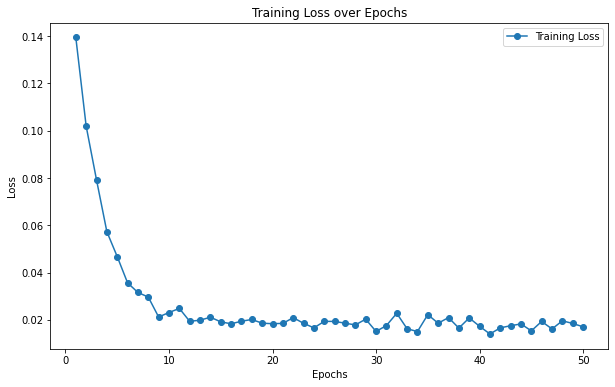

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

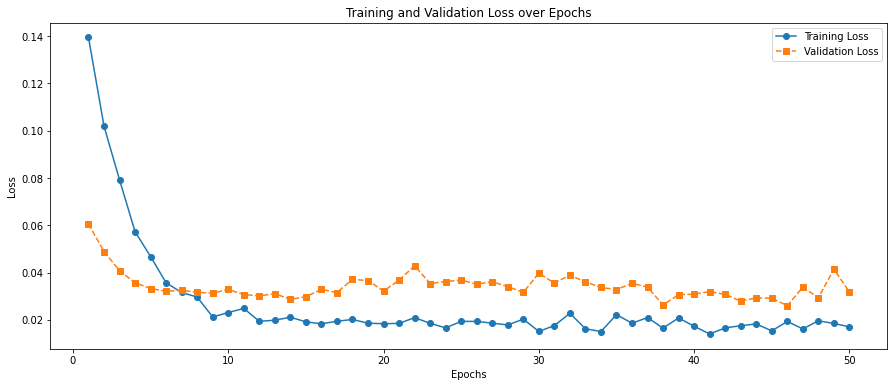

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Bering_model_LT3/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.07886715978080153
MAE : 0.06218633466346758


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,-47371.277344,2490.551
1,12535.162109,1707.377
2,35604.714844,11293.282
3,206457.687500,49957.406
4,362536.375000,151973.751
5,498478.843750,466524.938
6,554711.250000,708542.184
7,505866.750000,652598.000
8,459794.437500,414216.785
9,301735.000000,236263.303


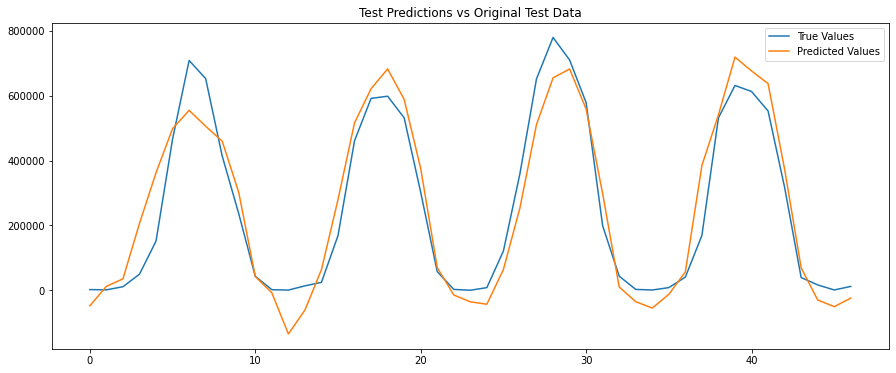

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

15/15 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

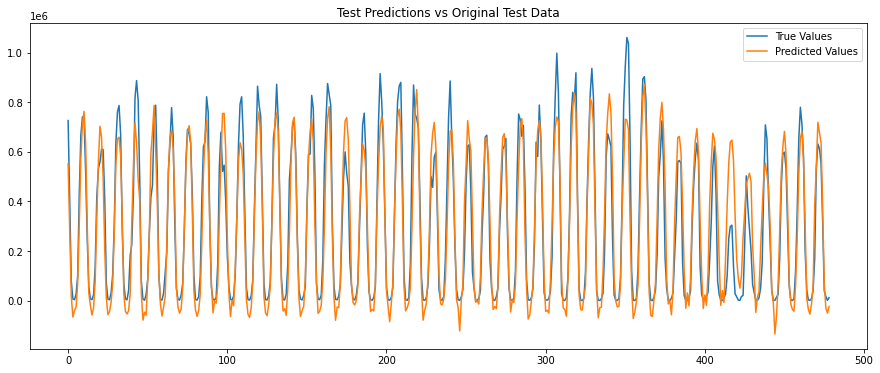

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()